In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
folder = 'C:/Users/agust/Desktop/MNIST/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [5]:
x_train = x_train/255
x_valid = x_valid/255 

In [6]:
x_train1 = x_train
x_train2 = x_train



In [7]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

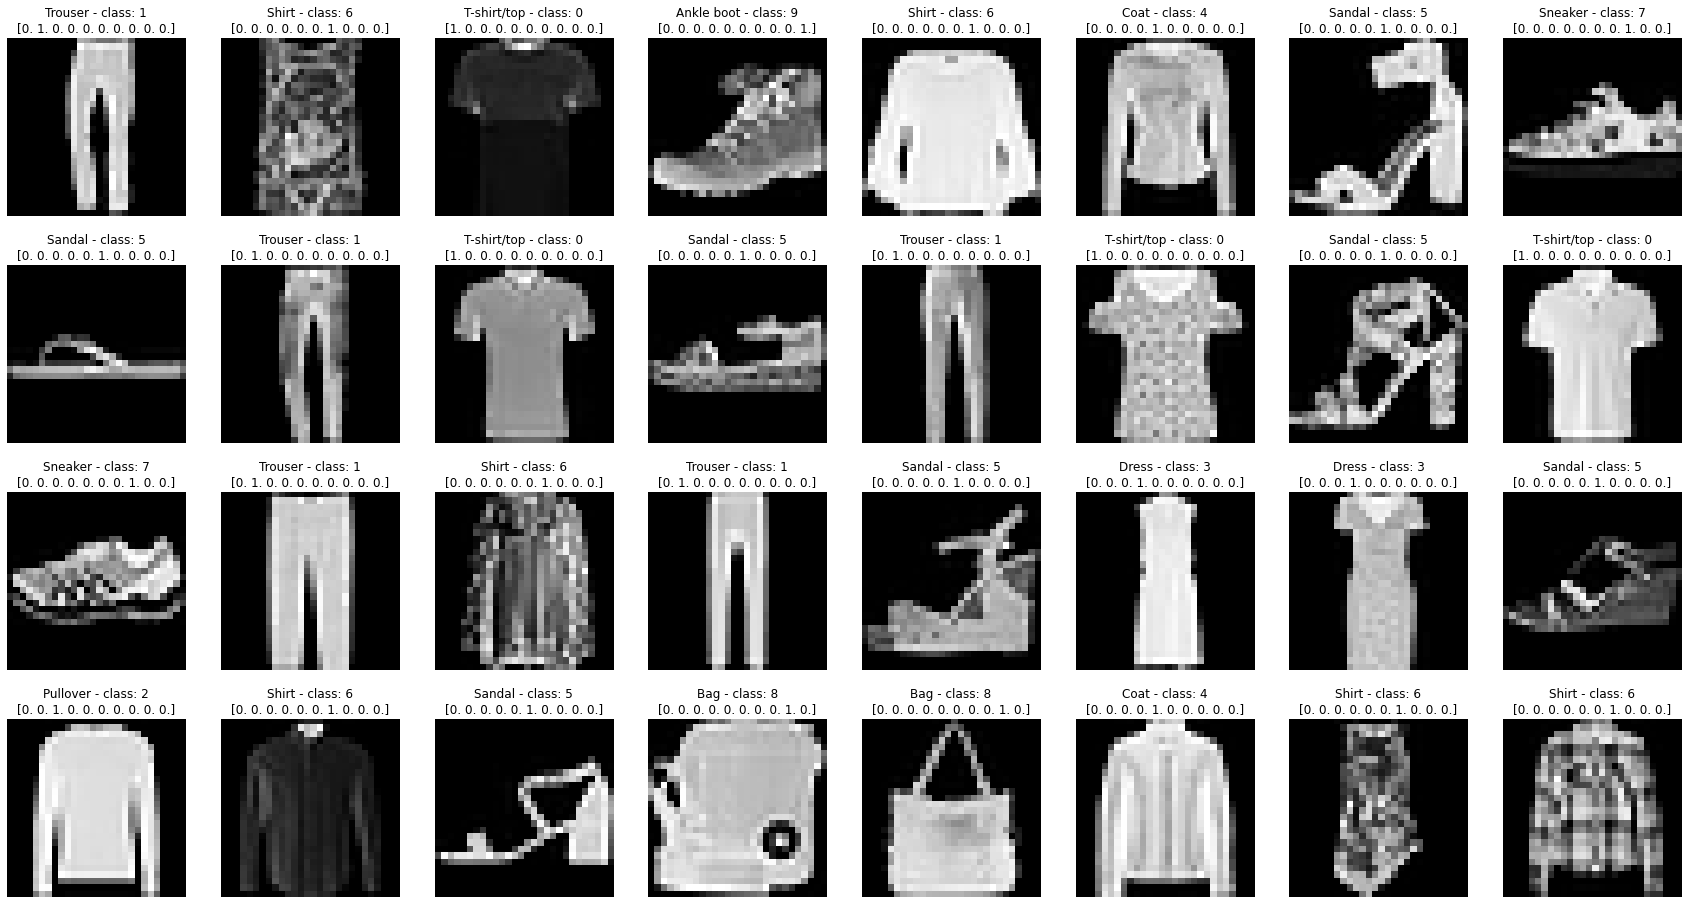

In [8]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [9]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(100, name='hidden1')) #nueva
model_single_layer.add(Activation('relu')) #nueva
model_single_layer.add(Dropout(0.4)) #nueva
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 Salida (Dense)              (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-traina

In [10]:
lr = 0.0001 
SGD = optimizers.RMSprop(learning_rate = lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [11]:
batch_size = 32
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=150, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Epoch 1/150
1688/1688 [==============================] - 10s 5ms/step - loss: 0.9323 - accuracy: 0.6890 - val_loss: 0.5840 - val_accuracy: 0.8057
Epoch 2/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6130 - accuracy: 0.7931 - val_loss: 0.4947 - val_accuracy: 0.8347
Epoch 3/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5384 - accuracy: 0.8167 - val_loss: 0.4546 - val_accuracy: 0.8413
Epoch 4/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4985 - accuracy: 0.8298 - val_loss: 0.4279 - val_accuracy: 0.8525
Epoch 5/150
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4739 - accuracy: 0.8392 - val_loss: 0.4134 - val_accuracy: 0.8520
Epoch 6/150
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4551 - accuracy: 0.8447 - val_loss: 0.3997 - val_accuracy: 0.8575
Epoch 7/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4412 - accuracy: 0.8489 - val_loss: 0.3910 -

Epoch 57/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3288 - accuracy: 0.8925 - val_loss: 0.3440 - val_accuracy: 0.8898
Epoch 58/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3288 - accuracy: 0.8921 - val_loss: 0.3482 - val_accuracy: 0.8910
Epoch 59/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3295 - accuracy: 0.8923 - val_loss: 0.3421 - val_accuracy: 0.8902
Epoch 60/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3307 - accuracy: 0.8924 - val_loss: 0.3484 - val_accuracy: 0.8888
Epoch 61/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3324 - accuracy: 0.8927 - val_loss: 0.3441 - val_accuracy: 0.8897
Epoch 62/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3294 - accuracy: 0.8932 - val_loss: 0.3505 - val_accuracy: 0.8895
Epoch 63/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3289 - accuracy: 0.8922 - val_loss: 0

1688/1688 [==============================] - 13s 7ms/step - loss: 0.3112 - accuracy: 0.9034 - val_loss: 0.3797 - val_accuracy: 0.8898
Epoch 113/150
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3128 - accuracy: 0.9020 - val_loss: 0.3778 - val_accuracy: 0.8943
Epoch 114/150
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3088 - accuracy: 0.9031 - val_loss: 0.3805 - val_accuracy: 0.8912
Epoch 115/150
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3124 - accuracy: 0.9030 - val_loss: 0.3802 - val_accuracy: 0.8910
Epoch 116/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3152 - accuracy: 0.9016 - val_loss: 0.3774 - val_accuracy: 0.8927
Epoch 117/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3121 - accuracy: 0.9036 - val_loss: 0.3813 - val_accuracy: 0.8907
Epoch 118/150
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3087 - accuracy: 0.9035 - val_loss: 0.3717 -

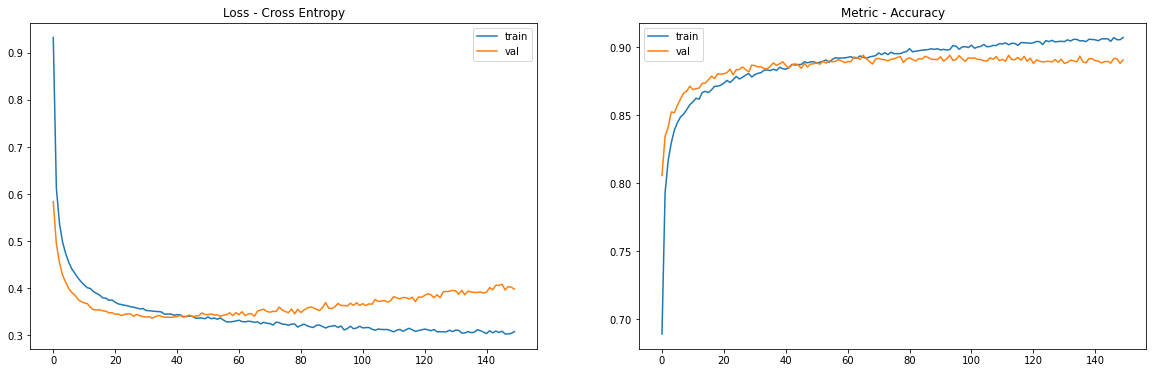

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [13]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.89083331823349 0.39825037121772766


In [14]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [15]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 0 7]


# Armo CSV para submitear

In [16]:
import pandas
import os
print(os.getcwd())
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')

C:\Users\agust\Downloads
